# Problem 11.16, Theodoridis, Page 589

SVM

In [10]:
#Main imports
import sklearn as skl
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
rng = np.random.default_rng(seed=42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

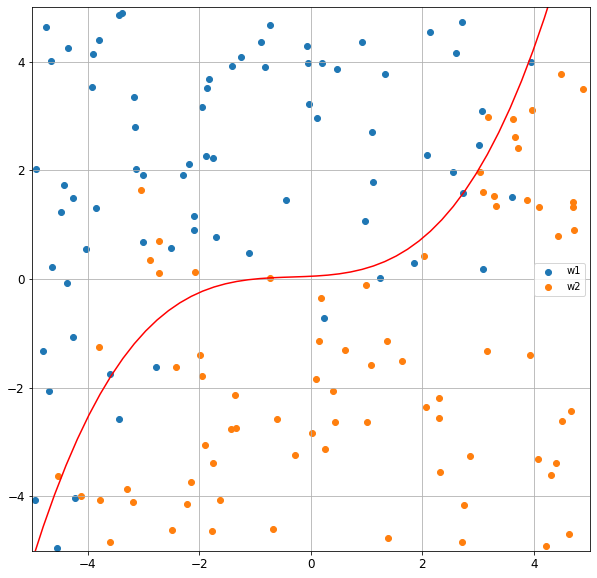

In [11]:
N = 150

xn = 10*np.random.rand(2, N)-5
yn = [0.05*(x**3+x**2+x+1) + rng.normal(0, 2) for x  in xn[0,:]]

X = xn.T
y = xn[1,:] < yn

c1 = xn[:, y == 0 ]
c2 = xn[:, y == 1 ]

xx = np.linspace(-5, 5, 50)
yy = [0.05*(x**3+x**2+x+1) for x  in xx]

#########################################
fig = plt.figure(figsize=(10,10))

plt.scatter(c1[0], c1[1], label = 'w1')
plt.scatter(c2[0], c2[1], label = 'w2')
plt.plot(xx, yy, 'r')

plt.xlim(-5,5); plt.ylim(-5,5)
plt.grid(); plt.legend();# plt.axis("equal"); 


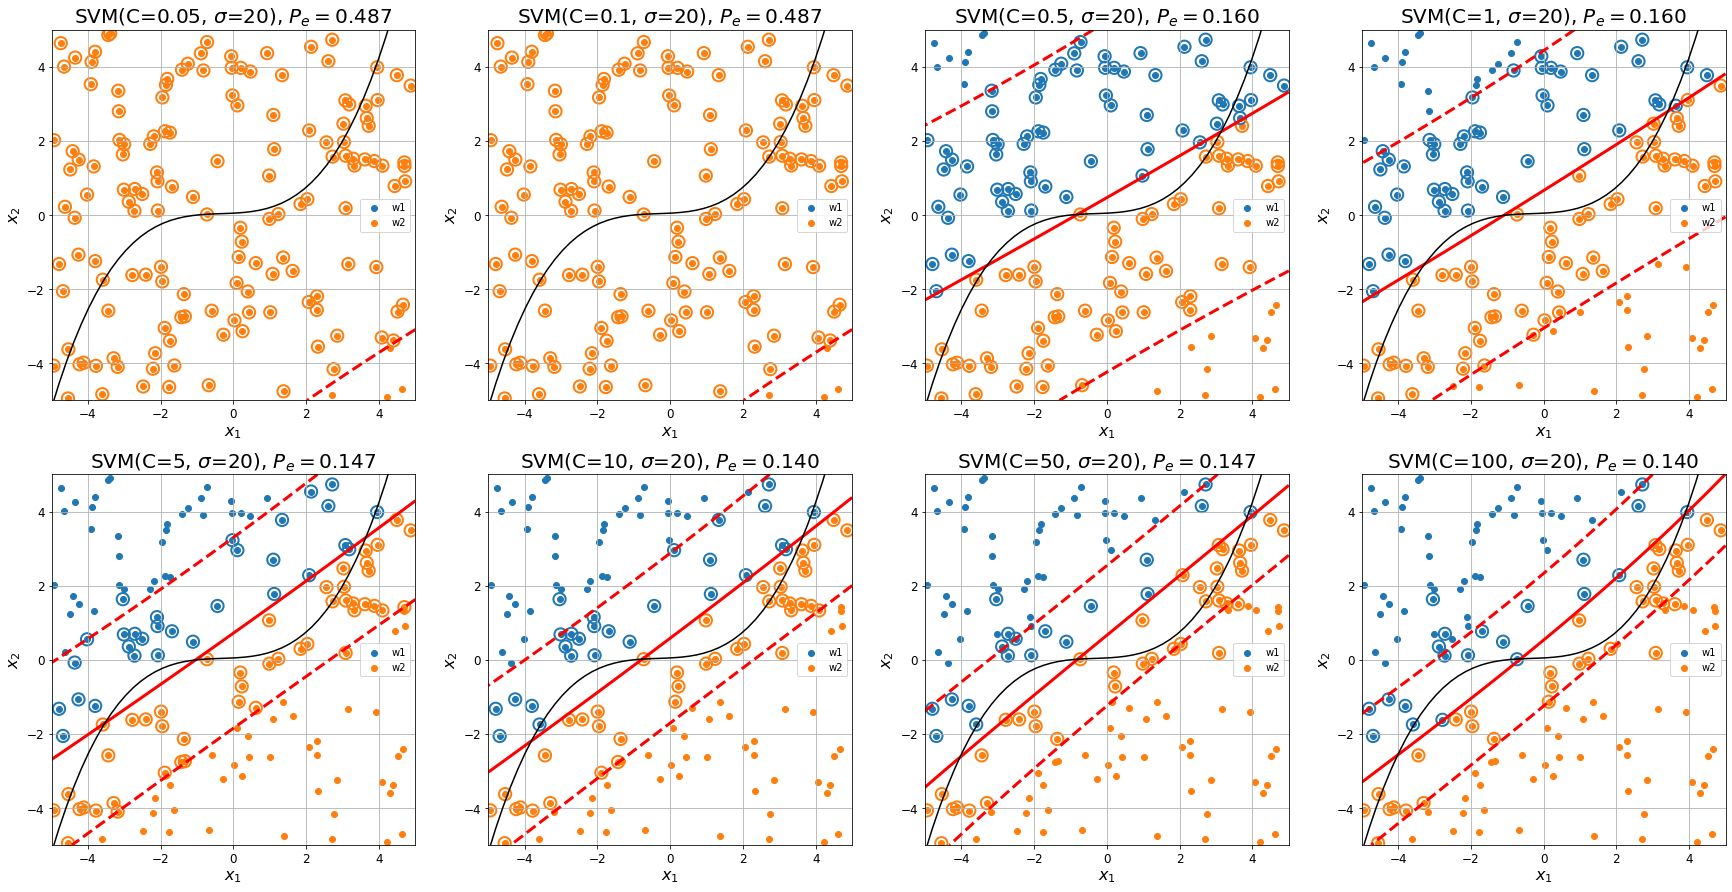

In [12]:
from sklearn.svm import SVC

def SVM(X, y, C=1, sigma=20, ax=None):
    clf = SVC(C = C, kernel='rbf', gamma=1/2*1/sigma**2)
    clf.fit(X, y)
    support_vectors = clf.support_vectors_
    y_test = clf.predict(xn.T)
    score = clf.score(X, y)

    c1 = xn[:, y_test == 0 ]
    c2 = xn[:, y_test == 1 ]

    #########################################
    if ax is None:
        fig, axs = plt.subplot(1,1, figsize=(10,10))
        ax = axs

    ax.scatter(c1[0], c1[1], label = 'w1')
    ax.scatter(c2[0], c2[1], label = 'w2')
    ax.plot(xx, yy, 'k')

    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.grid()
    ax.legend()
    # plt.axis("equal")
    ax.set_title(f"SVM(C={C}, "+r'$\sigma$'+f"={sigma}), "+r'$P_e=$'+f"{1-score:.3f}")
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')


    xd, yd = np.meshgrid(np.linspace(-5, 5, 100),
                         np.linspace(-5, 5, 100))
    w = clf.decision_function(np.c_[xd.ravel(), yd.ravel()])
    w = w.reshape(xd.shape)
    ax.contour(xd, yd, w, colors='r', levels=[-1, 0, 1], linewidths=3,# alpha=0.,
                linestyles=['--', '-', '--'])

    ySV = clf.predict(support_vectors)
    SV1, SV2 = support_vectors[ySV == 0, :], support_vectors[ySV == 1, :]
    ax.scatter(SV1[:, 0], SV1[:, 1], s=150,
                linewidth=2, facecolors='none', edgecolors='tab:blue')
    ax.scatter(SV2[:, 0], SV2[:, 1], s=150,
                linewidth=2, facecolors='none', edgecolors='tab:orange')

    
    return clf


fig, axs = plt.subplots(2,4, figsize=(30,15))
for i, C in enumerate([0.05, .1, .5, 1, 5, 10, 50, 100]):
    clf = SVM(X, y, C=C, sigma=20, ax=axs[i//4,i%4])


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma' : [0.0001, 0.001, 0.01, 0.1, 1]}

clf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=3)
clf.fit(X, y)
pd.DataFrame.from_dict(clf.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,0.000343,0.000025,0.000227,3.191981e-05,1,0.1,"{'C': 1, 'gamma': 0.1}",0.88,0.86,0.84,0.860000,0.016330,1
22,0.000316,0.000008,0.000192,5.455336e-06,10,0.01,"{'C': 10, 'gamma': 0.01}",0.88,0.86,0.84,0.860000,0.016330,1
27,0.000377,0.000006,0.000191,3.092301e-06,100,0.01,"{'C': 100, 'gamma': 0.01}",0.88,0.88,0.82,0.860000,0.028284,1
12,0.000372,0.000005,0.000256,8.036589e-06,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.88,0.86,0.82,0.853333,0.024944,4
21,0.000319,0.000002,0.000205,1.236308e-06,10,0.001,"{'C': 10, 'gamma': 0.001}",0.88,0.86,0.82,0.853333,0.024944,4
33,0.001026,0.000375,0.000190,4.753779e-06,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.96,0.80,0.80,0.853333,0.075425,4
25,0.000326,0.000005,0.000206,4.211312e-06,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.88,0.86,0.82,0.853333,0.024944,4
17,0.000331,0.000003,0.000211,4.224788e-06,1,0.01,"{'C': 1, 'gamma': 0.01}",0.88,0.86,0.82,0.853333,0.024944,4
26,0.000330,0.000008,0.000195,6.836514e-07,100,0.001,"{'C': 100, 'gamma': 0.001}",0.84,0.88,0.84,0.853333,0.018856,4
30,0.000340,0.000014,0.000194,1.083865e-06,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.84,0.88,0.82,0.846667,0.024944,10


# MLP - Problem 5

In [14]:
n_samples = 100000
beta = 1/2
nodes = 6
out_dim = 1

n = np.arange(0, n_samples, 1)
y = np.zeros((n_samples,))
y_test = np.zeros((n_samples,))
wp, wpp, wp_test, wpp_test = 0, 0, 0, 0
for i in range(n_samples):
    w = np.random.normal(0, 1)
    w_test = np.random.normal(0, 1)
    y[i] = w + beta * wp * wpp
    y_test[i] = w + beta * wp * wpp
    wp, wpp, wp_test, wpp_test = w, wp, w_test, wp_test

X = np.zeros((n_samples,6))
X_test = np.zeros((n_samples,6))
for i in range(n_samples):
    for j in range(nodes):
        if i - j - 1 > 0:
            X[i, j] = y[i-1-j]
            X_test[i, j] = y_test[i-1-j]
        else:
            X[i, j] = 0
            X_test[i, j] = 0

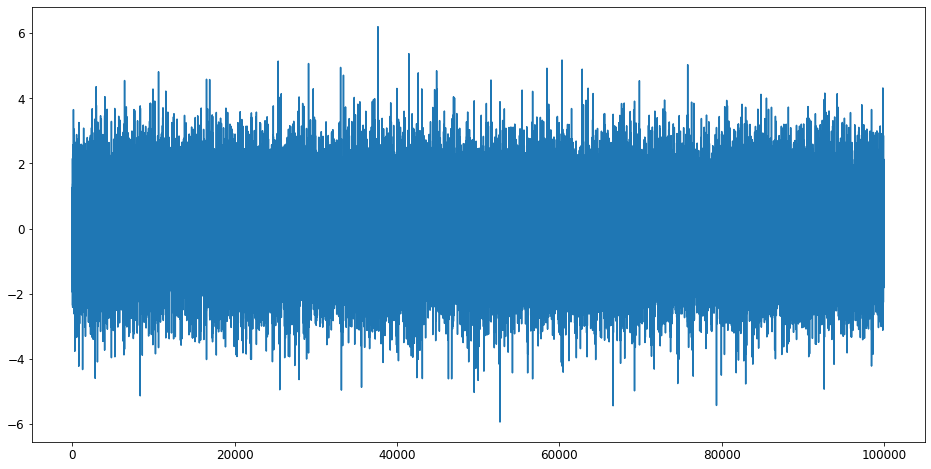

In [15]:
plt.figure(figsize=(16,8))
plt.plot(n,y)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "Multilayer_Perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 16)                112       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2021-09-09 18:19:28.083519: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-09-09 18:19:28.083535: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-09-09 18:19:28.211806: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-09-09 18:19:28.211935: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   3/1000 [..............................] - ETA: 1:36 - loss: 6.5374 - root_mean_squared_error: 2.5568

2021-09-09 18:19:28.348521: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-09-09 18:19:28.348541: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-09-09 18:19:28.494052: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-09-09 18:19:28.494263: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2021-09-09 18:19:28.530558: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 43 callback api events and 40 activity events. 
2021-09-09 18:19:28.532314: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-09-09 18:19:28.533719: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20210909-181928/train/plugins/profile/2021_09_09_18_19_28

2021-09-09 18:19:28.534720: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dum

1000/1000 [==============================] - 1s 1ms/step - loss: 1.3739 - root_mean_squared_error: 1.1721 - val_loss: 1.4072 - val_root_mean_squared_error: 1.1863
Epoch 2/100
1000/1000 [==============================] - 1s 800us/step - loss: 1.3346 - root_mean_squared_error: 1.1552 - val_loss: 1.4939 - val_root_mean_squared_error: 1.2223
Epoch 3/100
1000/1000 [==============================] - 1s 902us/step - loss: 1.4325 - root_mean_squared_error: 1.1969 - val_loss: 1.3113 - val_root_mean_squared_error: 1.1451
Epoch 4/100
1000/1000 [==============================] - 1s 891us/step - loss: 1.3482 - root_mean_squared_error: 1.1611 - val_loss: 1.5697 - val_root_mean_squared_error: 1.2529
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3210 - root_mean_squared_error: 1.1494 - val_loss: 1.4255 - val_root_mean_squared_error: 1.1940
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3050 - root_mean_squared_error: 1.1424 - val_loss: 1

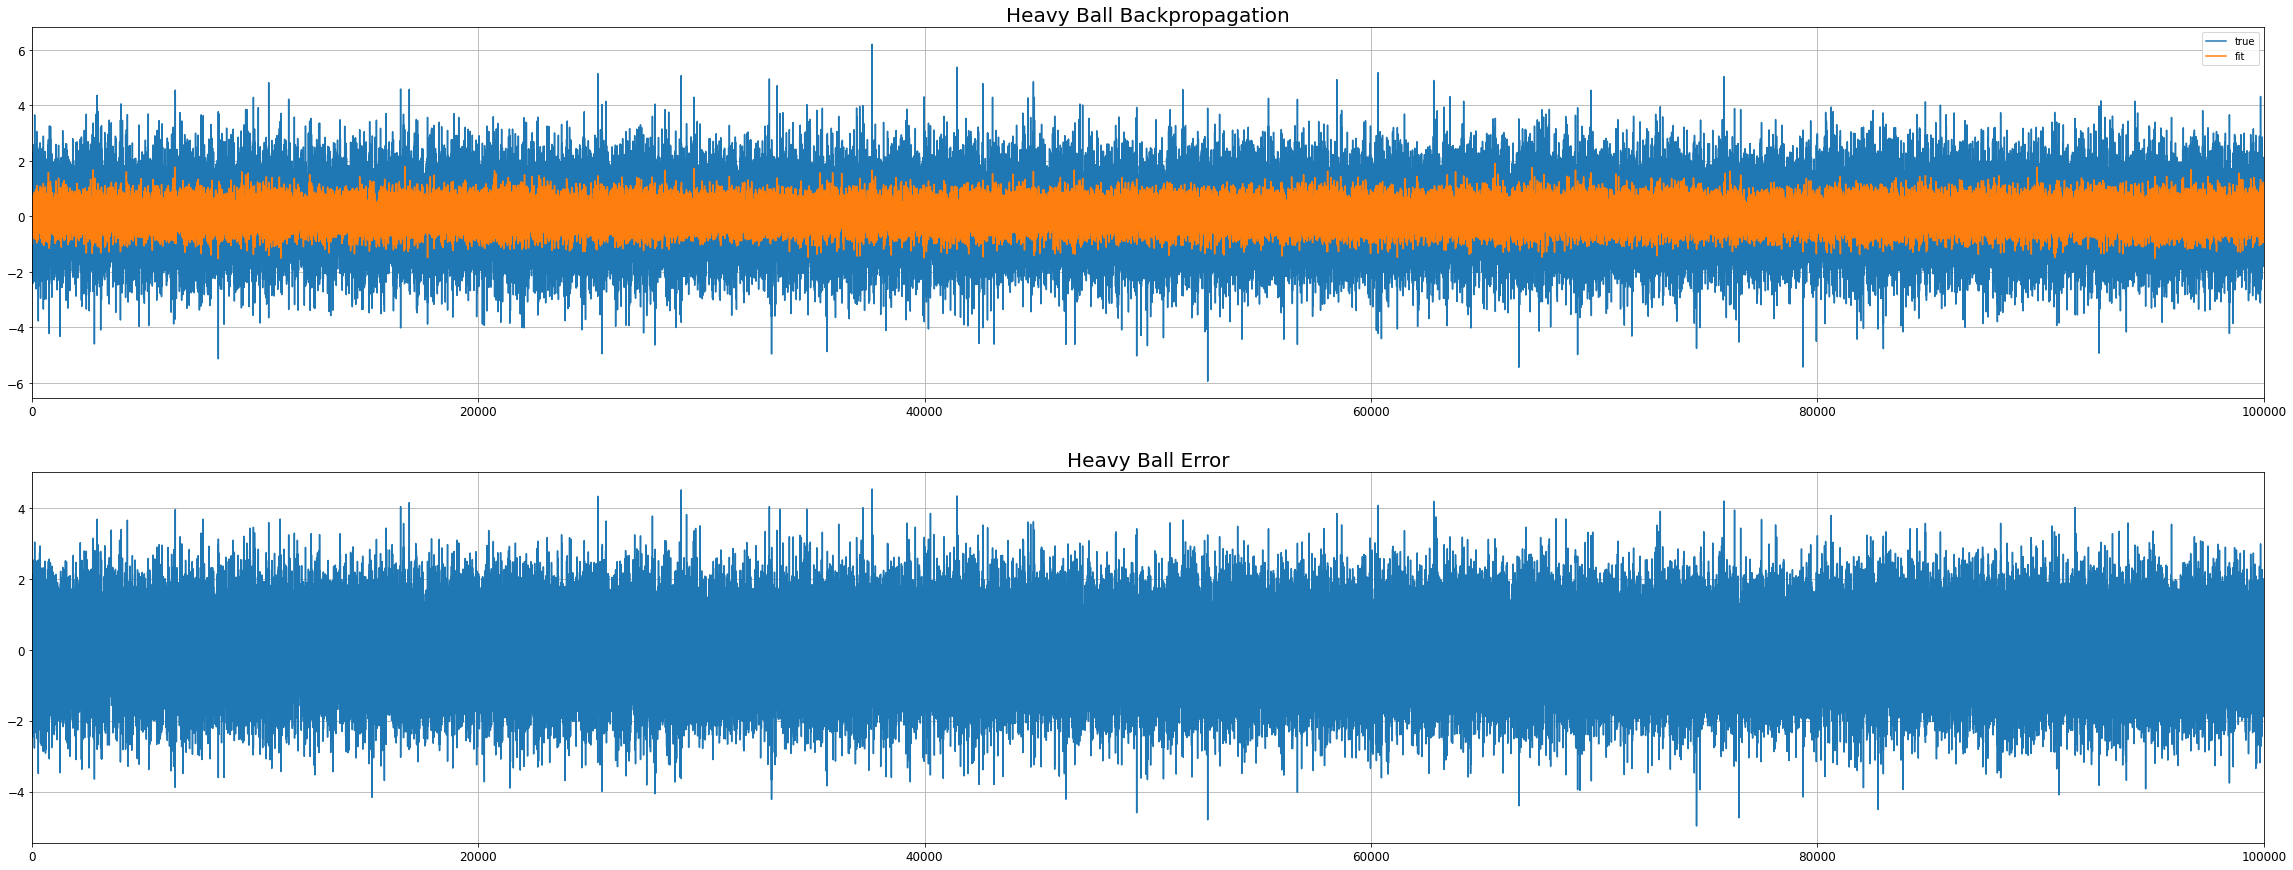

In [16]:
# from sklearn.neural_network import MLPRegressor
# mlp = MLPRegressor(hidden_layer_sizes=(16,), activation='logistic', learning_rate_init=0.001, momentum=0.9)
# mlp.fit(X, y)
%load_ext tensorboard

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import RootMeanSquaredError as RMSE
def MLP(nodes=6, out_dim=1, units=16,eta=0.001,momentum=0.9):
    model = Sequential(name='Multilayer_Perceptron')
    model.add(Dense(units=units, activation="sigmoid", input_dim=nodes, name='Hidden'))
    model.add(Dense(units=out_dim, activation="linear", name='Output'))

    opt = keras.optimizers.gradient_descent_v2.SGD(learning_rate=eta, momentum=momentum)
    model.compile(loss='mse', optimizer=opt, metrics=[RMSE()])
    return model

samples_per_epoch = 1000
epochs = 100
batch_size = 1
n_steps_per_epoch = samples_per_epoch / batch_size

mlp = MLP()
mlp.summary()


import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)
mlp.fit(X, y, batch_size=batch_size,epochs=epochs, steps_per_epoch=n_steps_per_epoch, validation_data=(X_test[:1000], y_test[:1000]), callbacks=[tensorboard_callback])

y_hat = mlp.predict(X_test).flatten()
f, axs = plt.subplots(2,1, figsize=(40, 15))
axs[0].plot(n,y_test, label='true')
axs[0].plot(n,y_hat, label='fit')
axs[0].set_title('Heavy Ball Backpropagation')
axs[0].legend()
axs[0].set_xlim(0,n_samples)
axs[0].grid()

axs[1].plot(n,y_test-y_hat)
axs[1].set_title('Heavy Ball Error')
axs[1].set_xlim(0,n_samples)
axs[1].grid()


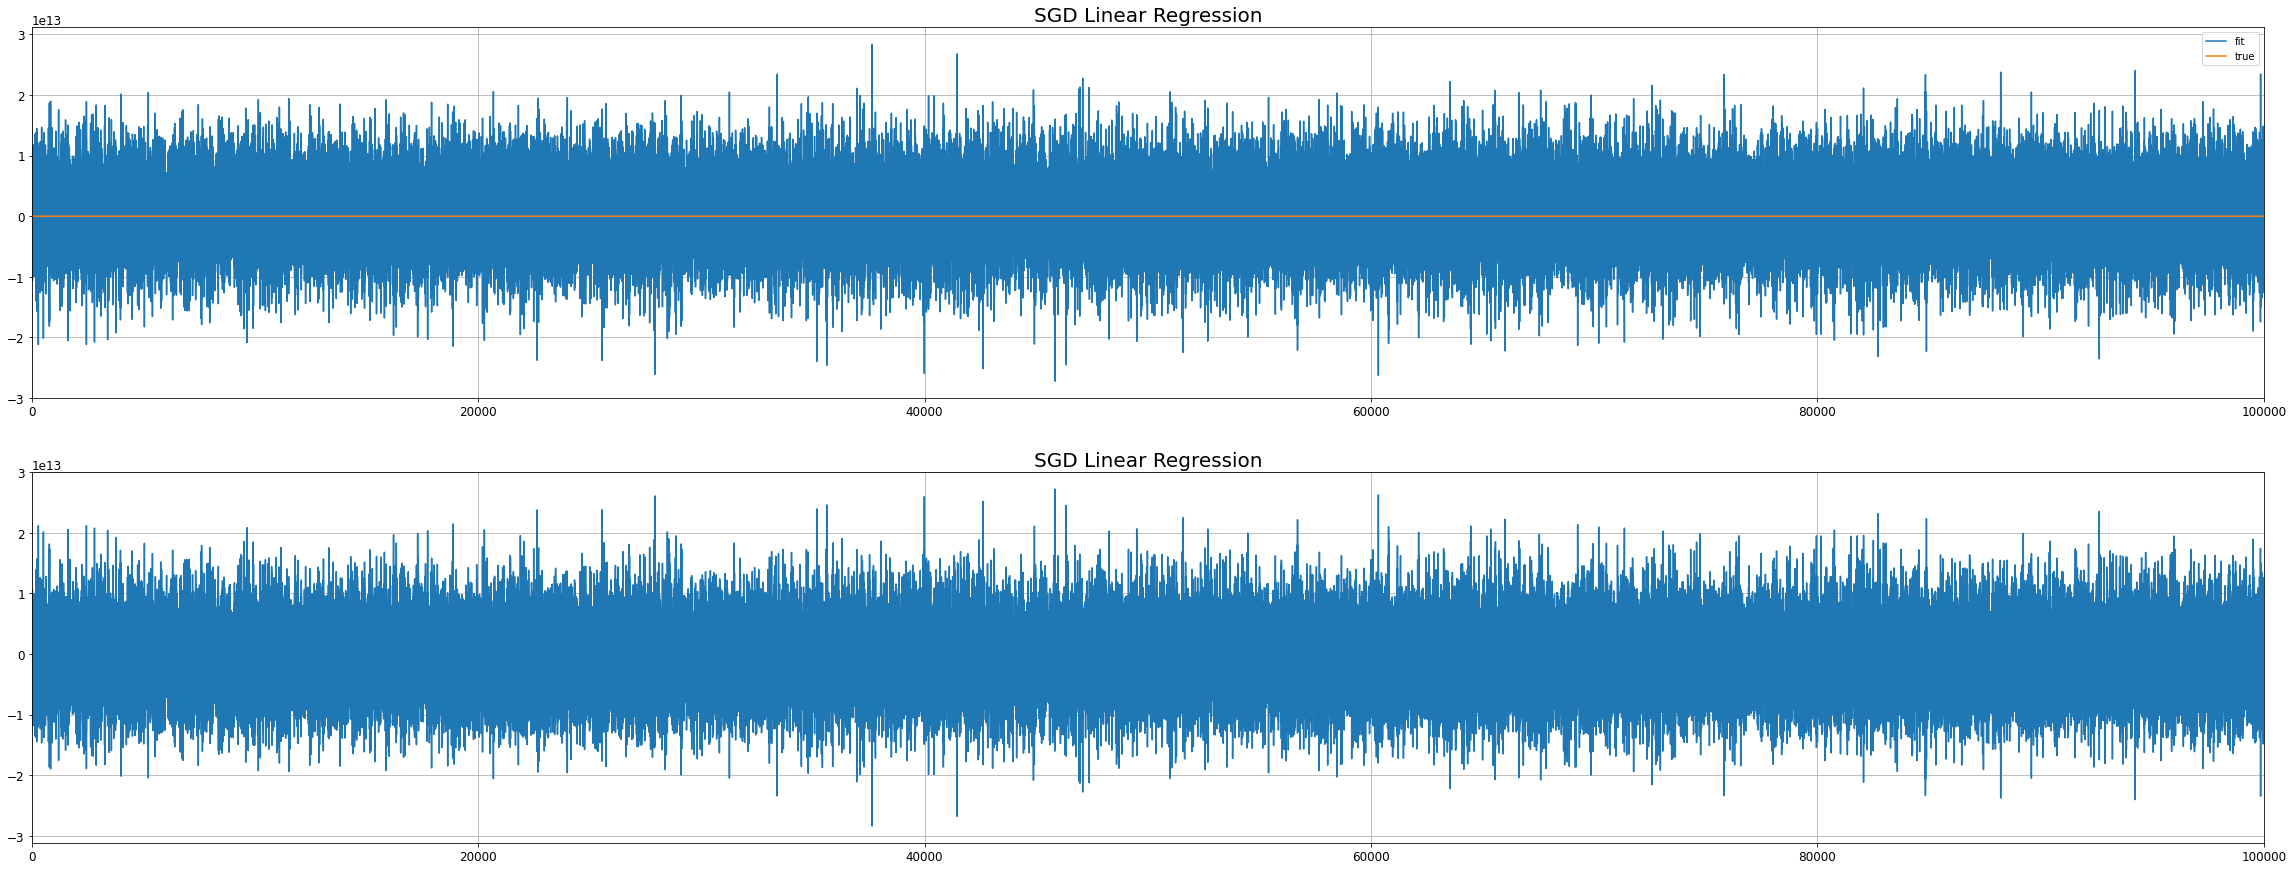

In [17]:
from sklearn.linear_model import SGDRegressor

lin_reg = SGDRegressor(learning_rate='constant', eta0=0.9, loss='squared_loss')
lin_reg.fit(X, y)
y_hat = lin_reg.predict(X_test)

f, axs = plt.subplots(2,1, figsize=(40, 15))
axs[0].plot(n,y_hat, label='fit')
axs[0].plot(n,y_test, label='true')
axs[0].set_title('SGD Linear Regression')
axs[0].legend()
axs[0].set_xlim(0,n_samples)
axs[0].grid()

axs[1].plot(n,y_test-y_hat)
axs[1].set_title('SGD Linear Regression')
axs[1].set_xlim(0,n_samples)
axs[1].grid()
